# UK Petrol Prices


# UK petrol Prices Up and Down

## This database About How diesel and petrol Prices Rising day By day in UK

- Content
- Diesel Price And Petrol Price

## Data Exploration

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing the dataset

df=pd.read_csv("../input/uk-petrol-prices/UK Petrol Prices.csv")

In [3]:
# looking the data set
df.head()

,Date,Diesel (USD),difference,Number of Records,Petrol (USD)
0,09-06-2003,76.773394,2.183110,1,74.590284
1,16-06-2003,76.689054,2.219911,1,74.469143
2,23-06-2003,76.620546,2.196980,1,74.423566
3,30-06-2003,76.505260,2.152839,1,74.352421
4,07-07-2003,76.457376,2.173639,1,74.283737


In [4]:
# print the shape dataset
print("Shape The DataSet ", df.shape )

Shape The DataSet  (882, 5)


In [5]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               881 non-null    object 
 1   Diesel (USD)       881 non-null    float64
 2   difference         881 non-null    float64
 3   Number of Records  882 non-null    int64  
 4   Petrol (USD)       881 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 34.6+ KB


In [6]:
#checking null value 
df.isna().sum()

Date                 1
Diesel (USD)         1
difference           1
Number of Records    0
Petrol (USD)         1
dtype: int64

### We have one value - null , I will drop this value 

In [7]:
# drop null value
df.dropna(inplace=True)

In [8]:
# Convert data type from object to datetime at column - Date
df["Date"]=pd.to_datetime(df["Date"])

In [9]:
# add column Years 
df["Year"]=df["Date"].dt.year

In [10]:
df.head()

,Date,Diesel (USD),difference,Number of Records,Petrol (USD),Year
0,2003-09-06,76.773394,2.183110,1,74.590284,2003
1,2003-06-16,76.689054,2.219911,1,74.469143,2003
2,2003-06-23,76.620546,2.196980,1,74.423566,2003
3,2003-06-30,76.505260,2.152839,1,74.352421,2003
4,2003-07-07,76.457376,2.173639,1,74.283737,2003


In [11]:
# looking  describe data set
df.describe().round(2)

,Diesel (USD),difference,Number of Records,Petrol (USD),Year
count,881.00,881.00,881.0,881.00,881.00
mean,115.61,4.51,1.0,111.11,2011.37
std,19.72,2.96,0.0,18.59,4.89
min,76.41,-2.53,1.0,74.21,2003.00
25%,98.51,2.15,1.0,95.31,2007.00
50%,118.60,4.21,1.0,114.78,2011.00
75%,132.87,5.91,1.0,127.92,2016.00
max,148.04,15.09,1.0,142.17,2020.00


In [12]:
df["Number of Records"].unique()

array([1])

## First Summary 
- Coloumn Number of Records have one value =1

- The Max value of Diesel = 148.04 and the Min = 76.41 and the Mean = 115.61
- The Max value of Petrol = 142.17 and the Min = 74.21 and the Mean = 111.11

# Visualutions

In [13]:
# Showing the different about Diesel (USD)and Petrol (USD) in this Date

px.line(df,x="Date",y="Diesel (USD)")


In [14]:
px.line(df,x="Date",y="Petrol (USD)")


In [15]:
px.line(df,x="Date",y="difference")

## We see stable different price but between year 2008 to 2009 up price different and also at 2016 down different price

# -------------------------------------------------------------------------------------------------------------------------

## Let's predict price using LinearRegression (ML)

In [16]:
df.head()

,Date,Diesel (USD),difference,Number of Records,Petrol (USD),Year
0,2003-09-06,76.773394,2.183110,1,74.590284,2003
1,2003-06-16,76.689054,2.219911,1,74.469143,2003
2,2003-06-23,76.620546,2.196980,1,74.423566,2003
3,2003-06-30,76.505260,2.152839,1,74.352421,2003
4,2003-07-07,76.457376,2.173639,1,74.283737,2003


In [17]:
#Defined X value and y value and z value , and split the data train

X = df["Year"].values.reshape(-1,1)            # x= years
y = df["Diesel (USD)"].values.reshape(-1,1)    # y= Diesel and we will predict value Diesel
z = df["Petrol (USD)"].values.reshape(-1,1)    # z= Petrol and we will predict value Petrol

In [18]:
# split the data - years and Diesel to predict value y = Diesel 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (660, 1)
X Test  :  (221, 1)
Y Train :  (660, 1)
Y Test  :  (221, 1)


In [20]:
# using the model LinearRegression()
model=LinearRegression()

In [21]:
# fit model
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=model.predict(X_test)
y_pred

array([[111.75817336],
       [106.15672305],
       [117.35962366],
       [128.56252426],
       [111.75817336],
       [ 94.95382245],
       [122.96107396],
       [134.16397456],
       [114.55889851],
       [131.36324941],
       [125.76179911],
       [128.56252426],
       [108.9574482 ],
       [136.96469971],
       [131.36324941],
       [117.35962366],
       [108.9574482 ],
       [114.55889851],
       [111.75817336],
       [128.56252426],
       [111.75817336],
       [ 94.95382245],
       [108.9574482 ],
       [ 92.1530973 ],
       [111.75817336],
       [134.16397456],
       [108.9574482 ],
       [134.16397456],
       [128.56252426],
       [108.9574482 ],
       [120.16034881],
       [ 94.95382245],
       [108.9574482 ],
       [103.3559979 ],
       [114.55889851],
       [108.9574482 ],
       [ 94.95382245],
       [122.96107396],
       [111.75817336],
       [ 94.95382245],
       [100.55527275],
       [ 94.95382245],
       [139.76542487],
       [117

In [23]:
y_test

array([[112.758247  ],
       [118.056865  ],
       [142.998066  ],
       [111.01857   ],
       [126.522238  ],
       [ 77.535648  ],
       [136.357683  ],
       [132.388324  ],
       [140.1402825 ],
       [115.583255  ],
       [110.0064    ],
       [111.989891  ],
       [ 99.38525   ],
       [136.446383  ],
       [115.729385  ],
       [140.493994  ],
       [104.501039  ],
       [139.044761  ],
       [120.379937  ],
       [111.42730083],
       [118.970308  ],
       [ 79.270281  ],
       [109.985788  ],
       [ 77.517624  ],
       [112.593144  ],
       [133.667309  ],
       [ 98.316421  ],
       [137.029427  ],
       [106.321586  ],
       [100.02847   ],
       [139.171387  ],
       [ 82.906787  ],
       [106.279894  ],
       [ 90.109189  ],
       [139.86154   ],
       [ 97.570595  ],
       [ 78.254358  ],
       [135.687292  ],
       [120.397225  ],
       [ 86.034388  ],
       [ 93.852165  ],
       [ 85.166606  ],
       [126.252648  ],
       [141

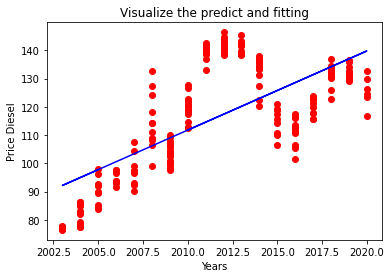

In [24]:
#Visualize the predict  and fitting
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,model.predict(X_train),color = 'blue')
plt.title("Visualize the predict and fitting")
plt.xlabel("Years")
plt.ylabel("Price Diesel")
plt.show()

## We see the model not fitting the data

## Model Evaluation

In [25]:
# Model Evaluation using mean absolute error
mean_absolute_error(y_test,y_pred)

11.746884566235526

In [26]:
#score 
model.score(X_test, y_test)

0.5019903842238609

# This model LinearRegression not succeed about predict price Diesel

## Let predict price Petrol using LinearRegression  -- z=Petrol

In [27]:
# split the data - years and Petrol to predict value z = Petrol 

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.25, random_state=42)

In [28]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("z Train : ", z_train.shape)
print("z Test  : ", z_test.shape)

X Train :  (660, 1)
X Test  :  (221, 1)
z Train :  (660, 1)
z Test  :  (221, 1)


In [29]:
# using the model2  LinearRegression() for Petrol
model1=LinearRegression()
# fit model
model1.fit(X_train,z_train)

LinearRegression()

In [30]:
y_pred2=model.predict(z_test)


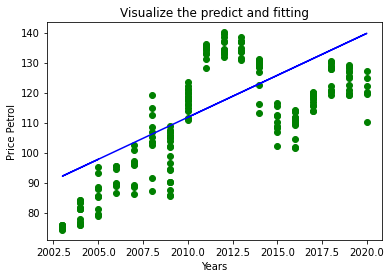

In [31]:
#Visualize the predict  and fitting
plt.scatter(X_test,z_test,color = 'green')
plt.plot(X_train,model.predict(X_train),color = 'blue')
plt.title("Visualize the predict and fitting")
plt.xlabel("Years")
plt.ylabel("Price Petrol")
plt.show()

In [32]:
# Model Evaluation using mean absolute error
mean_absolute_error(z_test,y_pred2)

5317.3983516637545

In [33]:
#score 
model.score(X_test, z_test)

0.4498713165850785

### This model LinearRegression not succeed about predict price Petrol

# Summary 
- We tried make predict the price using model LinearRegression but the score 44 to 50 % 
it failed .

- In next update I will make using another model ( DecisionTreeRegressor or Kmeans or SVM )

# Thanks for reading my analysis .